<a href="https://colab.research.google.com/github/jathusharini/DSGP_Group_03/blob/main/Final_MediaPipeSSL_Pickle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Installing and importing necessary libraries


import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import pickle
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder


In [33]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

# Giving list of words
words = ['angry','bank', 'brother','bye','excuse me','father', 'good evening', 'good morning', 'good night', 'happy','hello', 'help','home', 'hospital','how much', 'hungry','love', 'mother', 'police station', 'sad', 'school', 'sister','sorry','thankyou', 'welcome', 'what', 'when', 'where', 'who','why']
len(words)

30

In [31]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands
dic = {}
with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5) as hands:
    for word in words:
        dire = os.path.join('/content/drive/MyDrive/MediaPipe_Data/Dataset_MediPipe/src_2', word)
        vids = os.listdir(dire)
        vid_no = 0
        print(word)
        dic[word] = []
        for i,vid in enumerate(vids):
            dic[word].append([])
            vidcap = cv2.VideoCapture(os.path.join('/content/drive/MyDrive/MediaPipe_Data/Dataset_MediPipe/src_2', word, vid))
            success,frame = vidcap.read()
            count = 0
            while success:     
                success,frame = vidcap.read()
                if success:
                    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                    results = hands.process(image)
                    if results.multi_hand_landmarks:
                        # Loop through each hand landmark in the list
                        for hand_landmarks in results.multi_hand_landmarks:
                            # Get the landmarks for the hand
                            landmarks = hand_landmarks.landmark
                            landmarks_array = np.array([[landmark.x, landmark.y, landmark.z] for landmark in landmarks])
                            # Store the landmarks in the dataset array                             
                            dic[word][i].append(landmarks_array.flatten())
                            # Draw the hand landmarks on the image for visualization
                            mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                
            vid_no +=1

# create a binary pickle file 
#f = open()
#pickle.dump(dic,f)
#print("Successfuly transfered")
#f.close()
        

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/MediaPipe_Data/Dataset_MediPipe/src_2\\angry'

Start running from here

In [34]:
with open('preprocessed_model.pkl', 'rb') as f:
    data = pickle.load(f)
print("reading is successful")

def stretch(video, size):
    arr = np.array(video)
    n = len(arr)
    x = np.linspace(0, n - 1, n)
    new_x = np.linspace(0, n - 1, size)
    new_arr = np.zeros((size, len(video[0])))
    for i in range(size):
        new_arr[:, i] = np.interp(new_x, x, arr[:, i])
    
    return new_arr

reading is successful


In [35]:
for key in data.keys():
    print(key, len(data[key][1]))

angry 17
bank 109
brother 32
bye 38
excuse me 65
father 31
good evening 56
good morning 65
good night 74
happy 52
hello 34
help 60
home 19
hospital 103
how much 10
hungry 21
love 41
mother 30
police station 118
sad 27
school 75
sister 24
sorry 51
thankyou 23
welcome 35
what 17
when 29
where 9
who 19
why 24


In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

src_2 = {} 
for key in data.keys():
    arr = data[key]
    src_2[key] = []
    for vid in arr:
        if len(vid) !=0 :
            src_2[key].append(stretch(vid, 63))

minn = 200
for arr in src_2.values():
    for ar in arr:
        minn = min(minn, len(ar))
        
print(minn)

src_3 = {}
for key in src_2.keys():
    if len(src_2[key]) <= 63 and len(src_2[key]) >= 10:
        src_3[key] = src_2[key]

for key in src_3.keys():
    print(key, len(src_3[key]))



63
angry 25
bank 25
brother 25
bye 25
excuse me 25
father 25
good evening 25
good morning 25
good night 25
happy 25
hello 25
help 25
home 25
hospital 25
how much 25
hungry 25
love 25
mother 25
police station 25
sad 25
school 25
sister 25
sorry 25
thankyou 25
welcome 25
what 25
when 25
where 25
who 25
why 25


In [9]:
# create a binary pickle file 
f = open("/content/drive/MyDrive/MediaPipe_Data/Dataset_PKL_MediaPipe/framed_all.pkl","wb")
pickle.dump(src_3,f)
print("Successfuly transfered")
f.close()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/MediaPipe_Data/Dataset_PKL_MediaPipe/framed_all.pkl'

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

#words = src_3.keys()

words = src_2.keys()

label_map = {label:num for num, label in enumerate(words)}

print('label map: ', label_map)


label map:  {'angry': 0, 'bank': 1, 'brother': 2, 'bye': 3, 'excuse me': 4, 'father': 5, 'good evening': 6, 'good morning': 7, 'good night': 8, 'happy': 9, 'hello': 10, 'help': 11, 'home': 12, 'hospital': 13, 'how much': 14, 'hungry': 15, 'love': 16, 'mother': 17, 'police station': 18, 'sad': 19, 'school': 20, 'sister': 21, 'sorry': 22, 'thankyou': 23, 'welcome': 24, 'what': 25, 'when': 26, 'where': 27, 'who': 28, 'why': 29}


In [38]:
print("bye: ", src_3['bye'][0][0][0])

bye:  0.39737629890441895


In [39]:

sequences, labels = [], []
for word in words:
    for i,sequence in enumerate(src_3[word]):
        window = src_3[word][i][:63]
        sequences.append(np.asarray(window).astype('float32'))
        labels.append(label_map[word])
    

print('sequence shape: ', np.array(sequences).shape)

print("label shape: ", np.array(labels).shape)


sequence shape:  (750, 63, 63)
label shape:  (750,)


In [40]:
X = np.array(sequences)

print("array shape: ", X.shape)

array shape:  (750, 63, 63)


In [41]:
y = to_categorical(labels).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("y_test shape: ", y_test.shape)

y_test shape:  (150, 30)


In [42]:
print("X_train shape: ", X_train.shape)

X_train shape:  (600, 63, 63)


In [43]:
from tensorflow.keras.callbacks import TensorBoard

log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)



#New model

* src_2 = accuracy :    (Before removing frames)
* src_3 = accuracy : 92 (Unnessacary frames removed) : saved as "model" : Final_tf_mp_model

In [44]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt

# Create the model
model = tf.keras.models.Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(len(words), activation='softmax')
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['categorical_accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])


Epoch 1/2000
19/19 [==============================] - 1s 6ms/step - loss: 3.4145 - categorical_accuracy: 0.0517
Epoch 2/2000
19/19 [==============================] - 0s 6ms/step - loss: 3.2129 - categorical_accuracy: 0.0783
Epoch 3/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.9987 - categorical_accuracy: 0.1650
Epoch 4/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.7500 - categorical_accuracy: 0.2567
Epoch 5/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.5127 - categorical_accuracy: 0.3050
Epoch 6/2000
19/19 [==============================] - 0s 5ms/step - loss: 2.3213 - categorical_accuracy: 0.3533
Epoch 7/2000
19/19 [==============================] - 0s 6ms/step - loss: 2.1139 - categorical_accuracy: 0.4183
Epoch 8/2000
19/19 [==============================] - 0s 5ms/step - loss: 1.9468 - categorical_accuracy: 0.4933
Epoch 9/2000
19/19 [==============================] - 0s 5ms/step - loss: 1.8169 - categorical_accuracy:

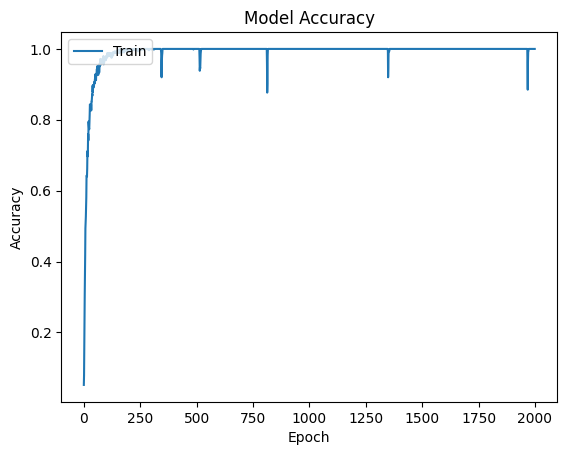

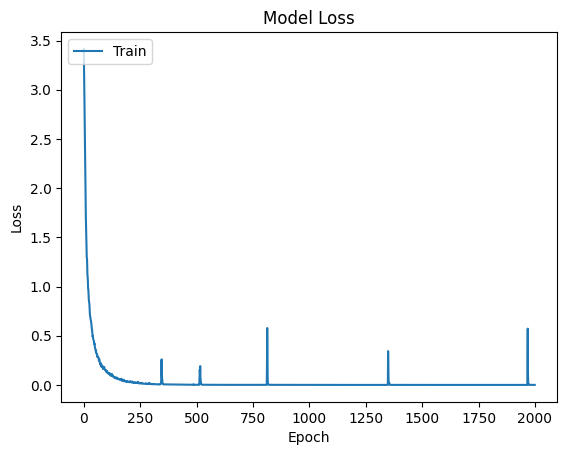

INFO:tensorflow:Assets written to: Final_Tf_mp_model\assets


INFO:tensorflow:Assets written to: Final_Tf_mp_model\assets


In [45]:
# Plot epoch vs accuracy
plt.plot(history.history['categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Plot epoch vs loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

#saving the model
model.save("Final_Tf_mp_model")

In [46]:
model = tf.keras.models.load_model('Final_Tf_mp_model')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 61, 32)            6080      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 30, 32)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_1 (Dense)             (None, 30)                28830     
                                                                 
Total params: 34,910
Trainable params: 34,910
Non-trainable params: 0
_________________________________________________________________


In [47]:
res = model.predict(X_test)

print("X_test shape: ", X_test.shape)


5/5 [==============================] - 0s 3ms/step
X_test shape:  (150, 63, 63)


In [48]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

yhat = model.predict(X_test)

5/5 [==============================] - 0s 3ms/step


In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

multilabel_confusion_matrix(ytrue, yhat)

array([[[144,   1],
        [  0,   5]],

       [[144,   2],
        [  0,   4]],

       [[145,   0],
        [  0,   5]],

       [[145,   1],
        [  1,   3]],

       [[145,   1],
        [  0,   4]],

       [[146,   1],
        [  0,   3]],

       [[142,   0],
        [  4,   4]],

       [[148,   0],
        [  0,   2]],

       [[142,   4],
        [  0,   4]],

       [[147,   0],
        [  0,   3]],

       [[144,   0],
        [  1,   5]],

       [[143,   1],
        [  3,   3]],

       [[146,   0],
        [  0,   4]],

       [[143,   0],
        [  0,   7]],

       [[146,   0],
        [  0,   4]],

       [[145,   0],
        [  0,   5]],

       [[146,   0],
        [  0,   4]],

       [[143,   0],
        [  0,   7]],

       [[140,   0],
        [  2,   8]],

       [[146,   0],
        [  0,   4]],

       [[142,   0],
        [  0,   8]],

       [[146,   0],
        [  0,   4]],

       [[144,   0],
        [  0,   6]],

       [[143,   0],
        [  1, 

In [50]:
print("Improved accuracy without validation datatsets", accuracy_score(ytrue, yhat))


Improved accuracy without validation datatsets 0.9


In [51]:
mp_hands = mp.solutions.hands
with mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5) as hands:
    vidcap = cv2.VideoCapture('/content/drive/MyDrive/MediaPipe_Data/Test_Video_MediaPipe/love_P5_1.mp4')
    success,frame = vidcap.read()
    count = 0
    test = []
    while success:     
        success,frame = vidcap.read()
        if success:
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = hands.process(image)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    landmarks = hand_landmarks.landmark
                    landmarks_array = np.array([[landmark.x, landmark.y, landmark.z] for landmark in landmarks])
                    test.append(landmarks_array.flatten())

nptest = np.array([test[:35]])

print("test shape: ", nptest.shape)



test shape:  (1, 0)


In [52]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# # Predict the labels of the test data
# yhat = model.predict(X_test)
# y_pred_classes = np.argmax(yhat, axis=1)

# # Convert the one-hot encoded labels to integers
# y_test_classes = np.argmax(y_test, axis=1)

# Get the classification report
print(classification_report(ytrue, yhat))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         5
           3       0.75      0.75      0.75         4
           4       0.80      1.00      0.89         4
           5       0.75      1.00      0.86         3
           6       1.00      0.50      0.67         8
           7       1.00      1.00      1.00         2
           8       0.50      1.00      0.67         4
           9       1.00      1.00      1.00         3
          10       1.00      0.83      0.91         6
          11       0.75      0.50      0.60         6
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         4
          17       1.00    

In [53]:
# Get the test accuracy
test_acc = model.evaluate(X_test, y_test)[1]
print("Test accuracy:", test_acc)

5/5 [==============================] - 0s 2ms/step - loss: 0.4375 - categorical_accuracy: 0.9000
Test accuracy: 0.8999999761581421


In [57]:
# Get the test proportion
test_proportion = len(X_test) / (len(X_train) + len(X_test))
print("Test proportion:", test_proportion)

Test proportion: 0.2


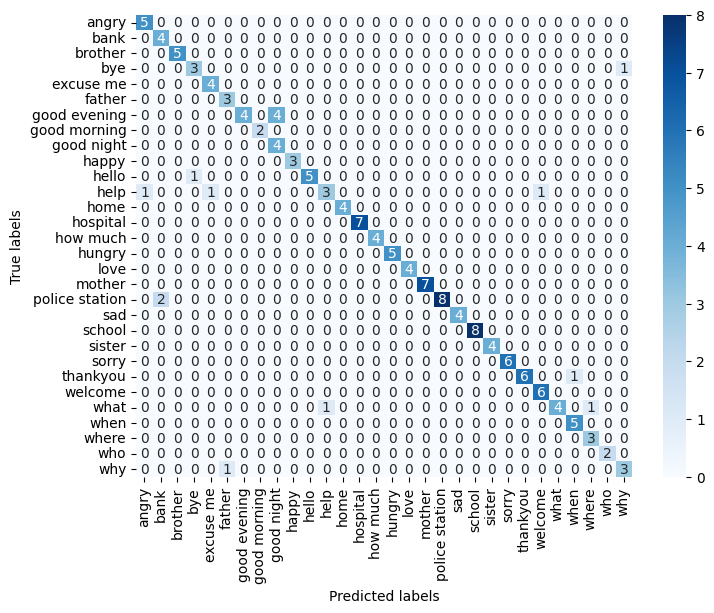

In [58]:
# Get the confusion matrix
cm = confusion_matrix(ytrue, yhat)

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=words, yticklabels=words)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [59]:
# Get the recall (weighted), f1 score (weighted), and precision (weighted)
weighted_metrics = classification_report(ytrue, yhat, output_dict=True)['weighted avg']
print("Weighted recall:", weighted_metrics['recall'])
print("Weighted f1 score:", weighted_metrics['f1-score'])
print("Weighted precision:", weighted_metrics['precision'])

Weighted recall: 0.9
Weighted f1 score: 0.8982183742183741
Weighted precision: 0.9222857142857142
